# Linear regresion and    least squares (OLS) regression

In [1]:
# Import library and read data with pandas 
import pandas as pd
CO2Data = pd.read_csv("../data/Terminos_lagoon_TA_DIC_2023_RawData.csv")

### Scatter plot  with linear regretion = scipy.stats.linregress

A simple and quick function for performing linear regression on two variables. It calculates the slope, intercept, R-squared, p-value, and standard error. Best for basic, exploratory analysis with one independent variable.

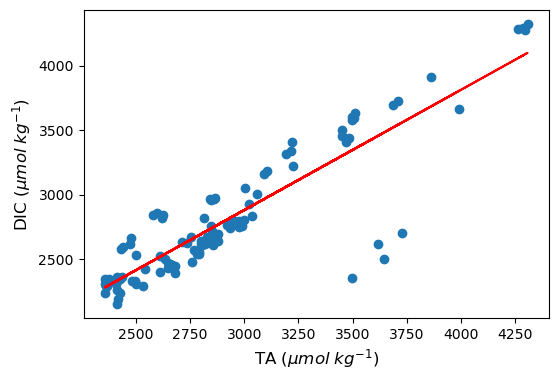

Slope: 0.9329743239047245


In [2]:
import matplotlib.pyplot as plt
from scipy import stats

x = CO2Data['ta_micromol_kg']
y = CO2Data['dic_micromol_kg']

plt.scatter(x, y, label='original data')

# Add labels and title
plt.xlabel('TA ($\mu mol  \; kg^{-1}$)', fontsize = 12, )
plt.ylabel('DIC ($\mu mol  \; kg^{-1}$)', fontsize = 12)

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot linear regression 

plt.plot(x, intercept + slope*x, 'r', label='fitted line')

# set the figure size
plt.gcf().set_size_inches(6, 4)

# save the plot as a PDF file paper format 
import os
output_dir = '../output_files'
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, 'DIC_TA_pH.pdf'), dpi=300, bbox_inches='tight')


plt.show()

print('Slope:', slope)


In [3]:
print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)

r-squared: 0.7784247010713174
p_value: 8.179416835110045e-36
slope: 0.9329743239047245
intercept: 80.30614134209554


### Perform  least squares (OLS) regression: scipy.stats.linregress

A powerful and detailed linear regression tool that supports both simple and multiple linear regression. It provides a full statistical report, including p-values, confidence intervals, and diagnostic tests. Ideal for professional data analysis and scientific reporting.

In [4]:
import statsmodels.api as sm
import numpy as np

# Define the independent and dependent variables
x = CO2Data['ta_micromol_kg']
y = CO2Data['dic_micromol_kg']

# Add a constant to include the intercept in the model
# This step is necessary; otherwise, the regression will be forced through the origin (intercept = 0)
x = sm.add_constant(x)

# Fit the Ordinary Least Squares (OLS) linear regression model
model = sm.OLS(y, x).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        dic_micromol_kg   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     365.4
Date:                Wed, 03 Sep 2025   Prob (F-statistic):           8.18e-36
Time:                        07:43:46   Log-Likelihood:                -728.75
No. Observations:                 106   AIC:                             1462.
Df Residuals:                     104   BIC:                             1467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             80.3061    144.021      0.

In [5]:
print("\n=== MODEL INTERPRETATION ===\n")

# R-squared and fit quality
r2 = model.rsquared
fit_quality = (
    "✔️ Good model fit: Explains most of the variance." if r2 >= 0.7 else
    "⚠️ Moderate model fit: Explains part of the variance." if r2 >= 0.4 else
    "❌ Weak model fit: Explains little variance. Review your model."
)
print(f"R² = {r2:.3f}\n{fit_quality}")

# Coefficients and p-values
results = model.summary2().tables[1]
slope_var = results.index.drop('const')[0]  # Assuming one predictor

print("\nCoefficients:")
for var, row in results.iterrows():
    coef, pval = row['Coef.'], row['P>|t|']
    significance = "✔️ Significant (p < 0.05)" if pval < 0.05 else "⚠️ Not significant (p ≥ 0.05)"
    print(f"- {var}: Coef = {coef:.4f}, p = {pval:.4f} → {significance}")

# Slope interpretation
slope_coef, slope_pval = results.loc[slope_var, ['Coef.', 'P>|t|']]
print(f"\nSlope ({slope_var}): {slope_coef:.4f}, p = {slope_pval:.4f} → "
      f"{'✔️ Significant' if slope_pval < 0.05 else '⚠️ Not significant'}")

# Standard Error
print(f"\nStandard Error of the model: {np.sqrt(model.scale):.4f}")


=== MODEL INTERPRETATION ===

R² = 0.778
✔️ Good model fit: Explains most of the variance.

Coefficients:
- const: Coef = 80.3061, p = 0.5783 → ⚠️ Not significant (p ≥ 0.05)
- ta_micromol_kg: Coef = 0.9330, p = 0.0000 → ✔️ Significant (p < 0.05)

Slope (ta_micromol_kg): 0.9330, p = 0.0000 → ✔️ Significant

Standard Error of the model: 236.4180


### Exercises: perform linear regressions of salinity vs temperature and dec vs salinity.

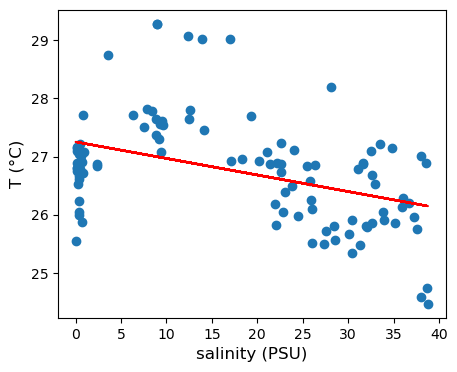

Slope: -0.028458717486946162


In [14]:
#GRÁFICA

import matplotlib.pyplot as plt
from scipy import stats

x = CO2Data['sal_psu']
y = CO2Data['temp_c']

plt.scatter(x, y, label='original data')

# Add labels and title
plt.xlabel('salinity (PSU)', fontsize = 12, )
plt.ylabel('T (°C)', fontsize = 12)

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot linear regression 

plt.plot(x, intercept + slope*x, 'r', label='fitted line')

# set the figure size
plt.gcf().set_size_inches(5, 4)


plt.show()

print('Slope:', slope)

In [26]:
#REGRESIÓN LINEAL

from scipy.stats import linregress

# Ajuste de regresión
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Función para interpretar resultados
def interpretar_regresion(r_value, p_value, slope, intercept, alpha=0.05):
    r_squared = r_value**2
    
    print("Resultados de la regresión lineal:")
    print(f"  r-squared   : {r_squared:.4f}")
    print(f"  p-value     : {p_value:.4e}")
    print(f"  slope       : {slope:.4f}")
    print(f"  intercept   : {intercept:.4f}")
    print("\nInterpretación:")
    
    if r_squared < 0.3:
        print("- El modelo explica poca variabilidad en los datos (baja capacidad predictiva).")
    elif r_squared < 0.7:
        print("- El modelo explica una parte moderada de la variabilidad de los datos.")
    else:
        print("- El modelo explica una gran proporción de la variabilidad de los datos.")
    
    if p_value < alpha:
        print(f"- La relación es estadísticamente significativa (p < {alpha}).")
    else:
        print(f"- No se encontró evidencia estadística suficiente (p ≥ {alpha}).")
    
    if slope > 0:
        print("- La pendiente positiva indica que Y tiende a aumentar con X.")
    elif slope < 0:
        print("- La pendiente negativa indica que Y tiende a disminuir con X.")
    else:
        print("- La pendiente es cercana a 0, no hay relación lineal clara.")
    
    print(f"- El intercepto ({intercept:.4f}) indica el valor esperado de Y cuando X=0.")

# Aquí se imprimen los resultados y la interpretación
interpretar_regresion(r_value, p_value, slope, intercept)

Resultados de la regresión lineal:
  r-squared   : 0.1775
  p-value     : 6.8799e-06
  slope       : -0.0285
  intercept   : 27.2520

Interpretación:
- El modelo explica poca variabilidad en los datos (baja capacidad predictiva).
- La relación es estadísticamente significativa (p < 0.05).
- La pendiente negativa indica que Y tiende a disminuir con X.
- El intercepto (27.2520) indica el valor esperado de Y cuando X=0.
